In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Titanic Data

In [439]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv("titanic_test.csv")
IDtest = test["PassengerId"]
train_len = len(train)
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

Data Preprocessing

In [440]:
def determine_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if(pclass == 1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age

In [441]:
df['Age'] = df[['Age','Pclass']].apply(determine_age,axis=1)

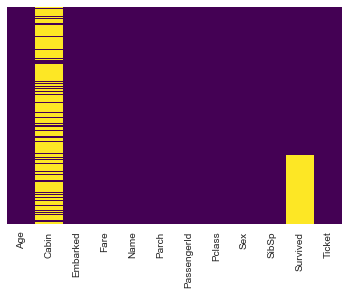

In [442]:
sns.heatmap(df.isnull(),annot=False, yticklabels=False,cbar=False,cmap='viridis')

In [443]:
df.drop(axis=1,labels=['Cabin'], inplace=True)

In [444]:
df.head(2)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [445]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
df = pd.concat([df,Sex],axis=1)

In [446]:
#df.dropna(inplace=True)

In [447]:
df['Title']= df['Name'].apply(lambda name:name.split('.')[0].split(',')[1].strip())

In [448]:
df['NameLength'] = df['Name'].apply(lambda name:len(name.strip()))

In [449]:
#df['Ticket_Length'] = df['Ticket'].apply(lambda x: len(x))
        

In [450]:
df['Ticket_Lett'] = df['Ticket'].apply(lambda x: str(x)[0])
df['Ticket_Lett'] = df['Ticket_Lett'].apply(lambda x: str(x))
df['Ticket_Lett'] = np.where((df['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df['Ticket_Lett'],
                                   np.where((df['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))

In [451]:
Ticket_Lett = pd.get_dummies(df['Ticket_Lett'])
#df = pd.concat([df,Ticket_Lett],axis=1)
df.drop(labels = ['Ticket_Lett'],axis=1, inplace=True )

In [452]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Dona              1
Don               1
Capt              1
Jonkheer          1
Sir               1
the Countess      1
Mme               1
Name: Title, dtype: int64

In [453]:
def standardize_title(title):
    if title.lower() in ['mr','miss','mrs','master']:
        return title
    else:
        return 'Rare'

In [454]:
df['Title'] = df['Title'].apply(standardize_title)

In [455]:
df['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Rare       34
Name: Title, dtype: int64

In [456]:
Titles = pd.get_dummies(df['Title'],drop_first=True)
df = pd.concat([df,Titles],axis=1)

In [457]:
df['FamilySize'] = df[['Parch','SibSp']].apply(lambda cols:cols[0]+cols[1] +1,axis=1)

In [458]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,male,Title,NameLength,Miss,Mr,Mrs,Rare,FamilySize
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,23,0,1,0,0,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,Mrs,51,0,0,1,0,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,22,1,0,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,Mrs,44,0,0,1,0,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Mr,24,0,1,0,0,1


In [459]:
df['FareCategory'] = df['Fare'].apply(lambda x: 'high' if x > 50 else 'low' )

In [460]:
category = pd.get_dummies(df['FareCategory'],drop_first=True)

In [461]:
df = pd.concat([df,category],axis =1)

In [462]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,male,Title,NameLength,Miss,Mr,Mrs,Rare,FamilySize,FareCategory,low
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,...,1,Mr,23,0,1,0,0,2,low,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,...,0,Mrs,51,0,0,1,0,2,high,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,...,0,Miss,22,1,0,0,0,1,low,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,...,0,Mrs,44,0,0,1,0,2,high,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,...,1,Mr,24,0,1,0,0,1,low,1


In [463]:
df.drop(labels = ['Name','Sex','Ticket','Title','FareCategory'],axis=1, inplace=True )

In [464]:
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,Embarked],axis =1)

In [465]:
df.drop(labels=['Embarked'], axis=1, inplace=True)

In [466]:
df.drop(labels=['Fare'], axis=1, inplace=True)

In [467]:
df.count()

Age            1309
Parch          1309
PassengerId    1309
Pclass         1309
SibSp          1309
Survived        891
male           1309
NameLength     1309
Miss           1309
Mr             1309
Mrs            1309
Rare           1309
FamilySize     1309
low            1309
Q              1309
S              1309
dtype: int64

In [468]:
train = df[:train_len]
test = pd.DataFrame.copy(df[train_len:], deep=True)

In [469]:
test.drop('PassengerId', axis=1, inplace =True)
test.drop('Survived', axis=1, inplace =True)

In [470]:
X = train.drop(labels= ['PassengerId','Survived'],axis=1)
y = train['Survived']

Check for Outlier

In [471]:
# 1st quartile (25%)
Q1 = np.percentile(df['Age'], 25)
# 3rd quartile (75%)
Q3 = np.percentile(df['Age'],75)
# Interquartile range (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 1.5 * IQR

# Determine a list of indices of outliers for feature col
outlier_list_col = df[(df['Age'] < Q1 - outlier_step) | (df['Age'] > Q3 + outlier_step )].index

# There are outlier problem in titanic to deal , the above code is for reference

Modelling with common algorithms

In [472]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [473]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification,confusion_matrix

Try Stratified K Fold Cross validation 

In [474]:
kfold = StratifiedKFold(n_splits = 10,shuffle=True)

In [475]:
lrm = LogisticRegression()
lrm_param_grid = {"C":[.001,.003,.01,.03,1,3,10],
                 }
lrmGS = GridSearchCV(lrm,param_grid = lrm_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
lrmGS.fit(X,y)
lrm_best = lrmGS.best_estimator_

lrmGS.best_score_

#CV_Result = cross_val_score(lrm,X,y, scoring='accuracy',cv=kfold)
#print(CV_Result.mean())
#print(CV_Result.std())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:   27.2s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   27.5s finished


0.82154882154882158

# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X,y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [476]:
RFC_best = RandomForestClassifier(n_estimators=100, min_samples_leaf=10,min_samples_split=10,max_features=3, oob_score=True)

DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X,y)
ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X,y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [477]:
GBC_best = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=4,min_samples_leaf=100,max_features=0.3)

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [478]:
SVMC_best = SVC(probability=True, gamma=0.001,C=1000)

In [479]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#g = plot_learning_curve(gsSVMC.best_estimator_,"SVM learning curves",X,y,cv=kfold)

In [480]:
#g = plot_learning_curve(gsGBC.best_estimator_,"GB learning curves",X,y,cv=kfold)

Ensembling more than one model

In [481]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('lrm', lrm_best),
('svc', SVMC_best)], voting='soft', n_jobs=4)

#votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('lrm', lrm_best),
#('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X, y)

In [482]:
pred = pd.Series(votingC.predict(test), name='Survived')

In [484]:
output = pd.concat([IDtest,pred.astype(int)], axis=1)

In [485]:
output.to_csv("Titanic_Viswa7.csv",index=False)

In [437]:
df[df['PassengerId'].apply(lambda id: True if id in(893,1231,1236,1251)else False)]

,Age,Parch,PassengerId,Pclass,SibSp,Survived,male,NameLength,Miss,Mr,Mrs,Rare,FamilySize,low,Q,S
892,47.0,0,893,3,1,NaN,0,32,0,0,1,0,2,1,0,1
1230,24.0,0,1231,3,0,NaN,1,21,0,0,0,0,1,1,0,0
1235,24.0,1,1236,3,1,NaN,1,35,0,0,0,0,3,1,0,1
1250,30.0,0,1251,3,1,NaN,0,51,0,0,1,0,2,1,0,1
